# Introduction to pysptk

This notebook shows a few typical usages of pysptk, with a focus on a spectral parameter estimation. The steps are composed of:

- windowing
- mel-generalized cepstrum analysis
- visualize spectral envelope estimates

## Requirements

- pysptk: https://github.com/r9y9/pysptk
- seaborn https://github.com/mwaskom/seaborn
- scipy

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
import seaborn
seaborn.set_style("dark")
rcParams['figure.figsize'] = (16, 6)

In [3]:
import numpy as np
import pysptk
from scipy.io import wavfile

## Data

In [4]:
fs, x = wavfile.read(pysptk.util.example_audio_file())
assert fs == 16000

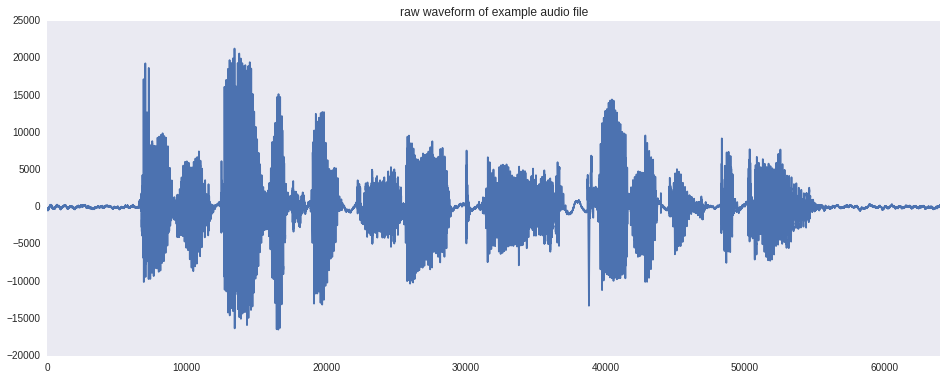

In [5]:
plot(x)
xlim(0, len(x))
title("raw waveform of example audio file")

## Windowing

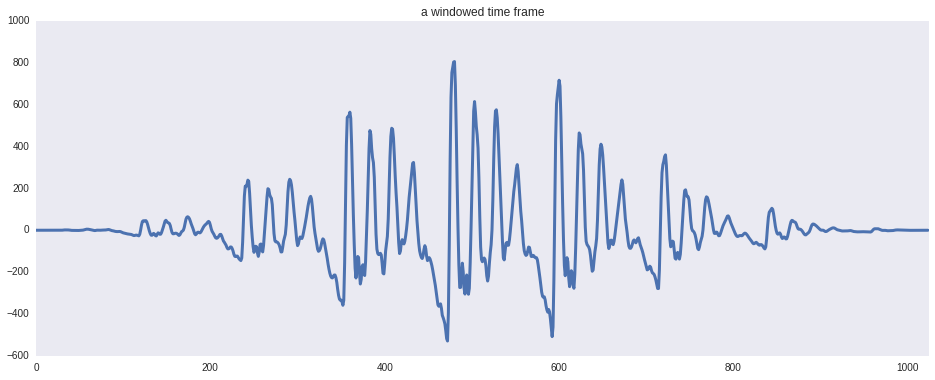

In [6]:
# Pick a short segment
pos = 40000
frame_length = 1024

xw = x[pos:pos+frame_length] * pysptk.blackman(frame_length)

plot(xw, linewidth=3.0)
xlim(0, frame_length)
title("a windowed time frame")

In [7]:
# plotting utility
def pplot(sp, envelope, title="no title"):
    plot(sp, "b-", linewidth=2.0, label="Original log spectrum 20log|X(w)|")
    plot(20.0/np.log(10)*envelope, "r-", linewidth=3.0, label=title)
    xlim(0, len(sp))
    xlabel("frequency bin")
    ylabel("log amplitude")
    legend(prop={'size': 20})

## Spectral parameter estimation and visualize it's spectral envelop estimate

In [8]:
# Compute spectrum 20log|X(w)| for a windowed signal
sp = 20*np.log10(np.abs(np.fft.rfft(xw)))

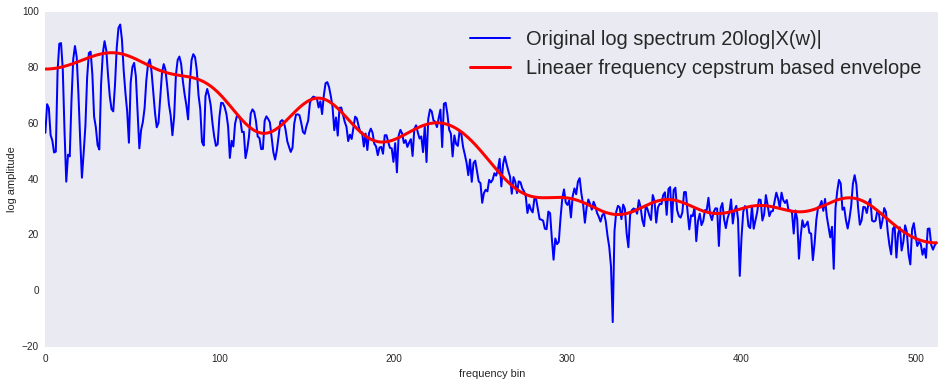

In [9]:
mgc = pysptk.mgcep(xw, 20, 0.0, 0.0)
pplot(sp, pysptk.mgc2sp(mgc, 0.0, 0.0, frame_length).real, title="Lineaer frequency cepstrum based envelope")

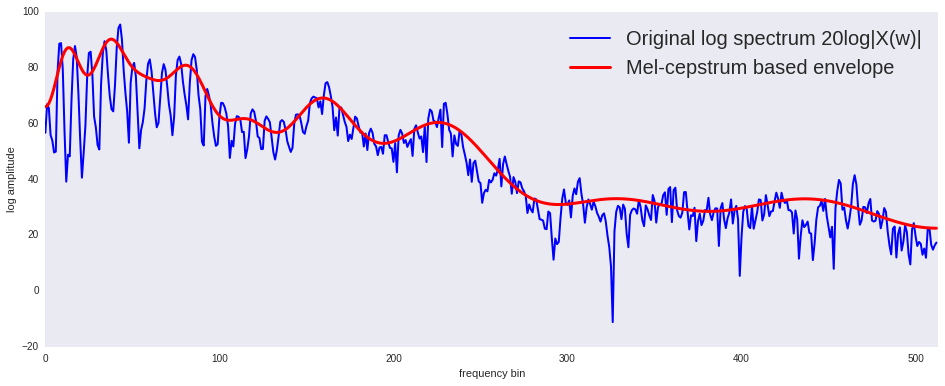

In [10]:
mgc = pysptk.mcep(xw, 20, 0.41)
pplot(sp, pysptk.mgc2sp(mgc, 0.41, 0.0, frame_length).real, title="Mel-cepstrum based envelope")

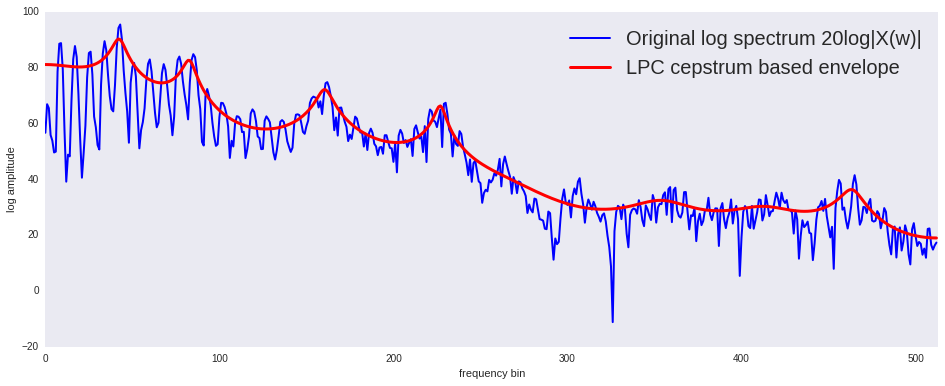

In [11]:
mgc = pysptk.mgcep(xw, 20, 0.0, -1.0)
pplot(sp, pysptk.mgc2sp(mgc, 0.0, -1.0, frame_length).real, title="LPC cepstrum based envelope")

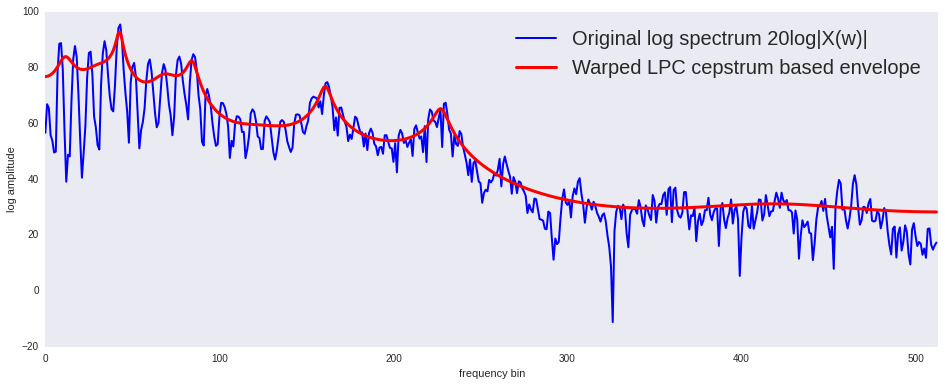

In [12]:
mgc = pysptk.mgcep(xw, 20, 0.41, -1.0)
pplot(sp, pysptk.mgc2sp(mgc, 0.41, -1.0, frame_length).real, title="Warped LPC cepstrum based envelope")

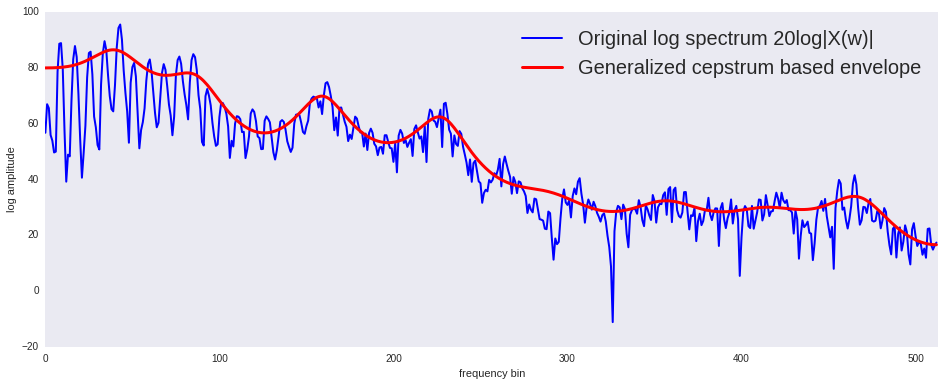

In [13]:
mgc = pysptk.gcep(xw, 20, -0.35)
pplot(sp, pysptk.mgc2sp(mgc, 0.0, -0.35, frame_length).real, title="Generalized cepstrum based envelope")

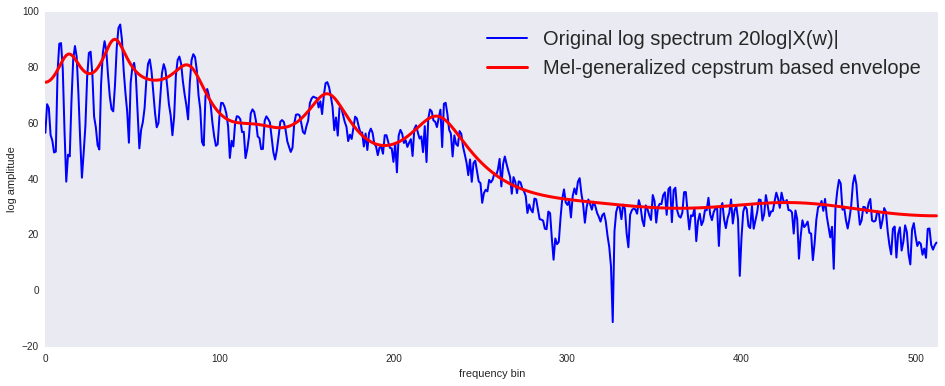

In [14]:
mgc = pysptk.mgcep(xw, 20, 0.41, -0.35)
pplot(sp, pysptk.mgc2sp(mgc, 0.41, -0.35, frame_length).real, title="Mel-generalized cepstrum based envelope")